# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Mount Drive**

In [2]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#import a copy of the dataset
df= pd.read_csv('/content/train.csv').copy()
#create an interactive table
from google.colab import data_table
data_table.enable_dataframe_formatter()
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

# **Handle Missing Data**

In [5]:
#from the above we can see that only postal-code column has a couple of empty rows
#now, lets find the count of empty rows in the column
null_count = df['Postal Code'].isnull().sum()
print("Number of null values in 'Postal Code' column:", null_count)

Number of null values in 'Postal Code' column: 11


In [6]:
#now lets replace the missing rows with "0" and change the data type to integer
df['Postal Code'].fillna(0, inplace=True)
df['Postal Code'] = df['Postal Code'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int64  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

# **Check for duplicates**

In [7]:
if df.duplicated().sum() > 0:
    print("There are duplicates in the dataset.")
else :
      print("There are no duplicates in the dataset.")


There are no duplicates in the dataset.


# **EXPLORATORY DATA ANALYSIS (EDA)**

# **Customer Segmentation**

In [8]:
#we try to understand the different customer segments
types_of_customers = df ['Segment'].unique()
print(types_of_customers)

['Consumer' 'Corporate' 'Home Office']


In [9]:
#now lets find out how big each segment is
customer_segment_counts = df['Segment'].value_counts().reset_index()
customer_segment_counts.columns = ['Segment', 'Count']
print(customer_segment_counts)

       Segment  Count
0     Consumer   5101
1    Corporate   2953
2  Home Office   1746


# **Visualizing the distribution**

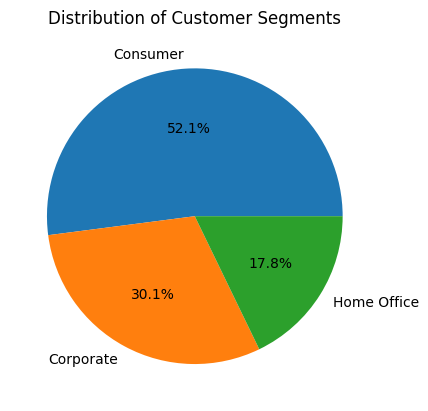

In [10]:
#let's create a piechart to visualize the breakdown of our customer base
plt.pie (customer_segment_counts['Count'], labels=customer_segment_counts['Segment'], autopct='%1.1f%%')
plt.title('Distribution of Customer Segments')
plt.show()

# **Analyzing Sales Across Segment**

   Client Type   Total Sales
0     Consumer  1.148061e+06
1    Corporate  6.884941e+05
2  Home Office  4.249822e+05


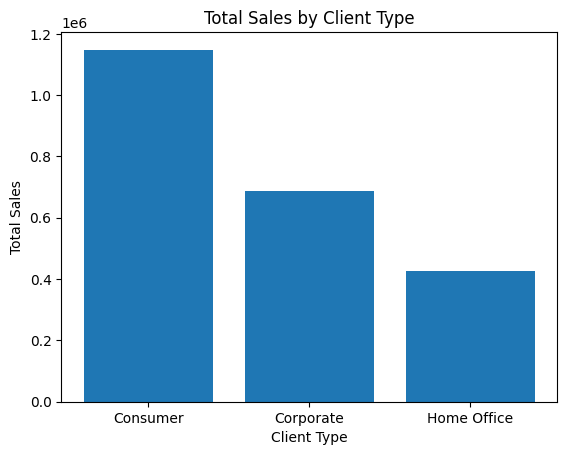

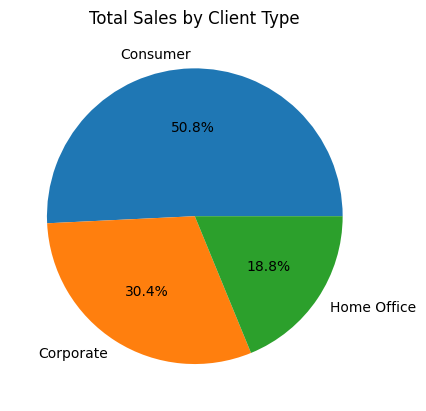

In [11]:
#now let's find which segment drives the most sales
sales_by_segment = df.groupby('Segment')['Sales'].sum().reset_index()
sales_by_segment.columns = ['Client Type','Total Sales']
print(sales_by_segment)

#bar chart
plt.bar(sales_by_segment['Client Type'], sales_by_segment['Total Sales'])
plt.xlabel('Client Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Client Type')
plt.show()

#pie chart
plt.pie(sales_by_segment['Total Sales'], labels=sales_by_segment['Client Type'], autopct='%1.1f%%')
plt.title('Total Sales by Client Type')
plt.show()


# **Customer Loyalty**

In [12]:
# Customer order frequency
order_frequency = df.groupby(['Customer ID','Customer Name','Segment'])['Order ID'].count().reset_index()
order_frequency.columns = ['Customer ID', 'Customer Name','Segment','Total Orders']
repeat_customers = order_frequency[order_frequency['Total Orders'] >= 1]
repeat_customers_sorted = repeat_customers.sort_values(by='Total Orders', ascending=False)
print(repeat_customers_sorted.head(12).reset_index(drop=True))


   Customer ID        Customer Name      Segment  Total Orders
0     WB-21850        William Brown     Consumer            35
1     PP-18955           Paul Prost  Home Office            34
2     MA-17560         Matt Abelman  Home Office            34
3     JL-15835             John Lee     Consumer            33
4     CK-12205  Chloris Kastensmidt     Consumer            32
5     SV-20365          Seth Vernon     Consumer            32
6     JD-15895     Jonathan Doherty    Corporate            32
7     AP-10915       Arthur Prichep     Consumer            31
8     ZC-21910     Zuschuss Carroll     Consumer            31
9     EP-13915           Emily Phan     Consumer            31
10    LC-16870        Lena Cacioppo     Consumer            30
11    Dp-13240          Dean percer  Home Office            29


# **Top-Spending Customers**

In [13]:
#we find the top-spending customers
Customers_Spendings = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Sales'].sum().reset_index()
top_spenders = Customers_Spendings.sort_values(by='Sales', ascending=False)
print(top_spenders.head(12).reset_index(drop=True))

   Customer ID       Customer Name      Segment      Sales
0     SM-20320         Sean Miller  Home Office  25043.050
1     TC-20980        Tamara Chand    Corporate  19052.218
2     RB-19360        Raymond Buch     Consumer  15117.339
3     TA-21385        Tom Ashbrook  Home Office  14595.620
4     AB-10105       Adrian Barton     Consumer  14473.571
5     KL-16645        Ken Lonsdale     Consumer  14175.229
6     SC-20095        Sanjit Chand     Consumer  14142.334
7     HL-15040        Hunter Lopez     Consumer  12873.298
8     SE-20110        Sanjit Engle     Consumer  12209.438
9     CC-12370  Christopher Conant     Consumer  12129.072
10    TS-21370        Todd Sumrall    Corporate  11891.751
11    GT-14710           Greg Tran     Consumer  11820.120


# **Understanding shipping methods**

In [14]:
#let's see the shipping methods available
shipping_methods = df['Ship Mode'].unique()
print(shipping_methods)

['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [15]:
#let's see how popular ech method is
shipping_model = df['Ship Mode'].value_counts().reset_index()
shipping_model.columns = ['Shipping Method', 'Frequency']
print(shipping_model)

  Shipping Method  Frequency
0  Standard Class       5859
1    Second Class       1902
2     First Class       1501
3        Same Day        538


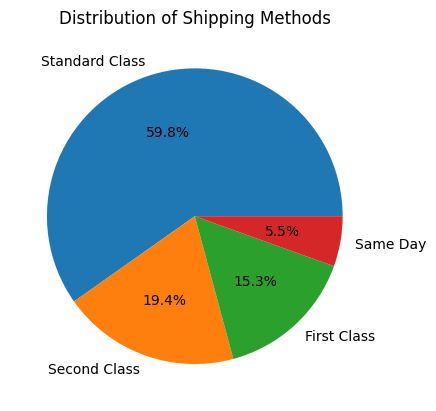

In [16]:
#Visualize the results
plt.pie(shipping_model['Frequency'], labels=shipping_model['Shipping Method'], autopct='%1.1f%%')
plt.title('Distribution of Shipping Methods')
plt.show()

# **Exploring Sales Across locations**

In [17]:
#Count of customers by state
customer_state_counts = df['State'].value_counts().reset_index()
customer_state_counts.columns = ['State', 'Number of Customers']
print(customer_state_counts.head(20) )



             State  Number of Customers
0       California                 1946
1         New York                 1097
2            Texas                  973
3     Pennsylvania                  582
4       Washington                  504
5         Illinois                  483
6             Ohio                  454
7          Florida                  373
8         Michigan                  253
9   North Carolina                  247
10        Virginia                  224
11         Arizona                  223
12       Tennessee                  183
13        Colorado                  179
14         Georgia                  177
15        Kentucky                  137
16         Indiana                  135
17   Massachusetts                  135
18          Oregon                  122
19      New Jersey                  122


In [18]:
#Customers by city
customer_city_counts = df['City'].value_counts().reset_index()
customer_city_counts.columns = ['City', 'Number of Customers']
print(customer_city_counts.head(20))

             City  Number of Customers
0   New York City                  891
1     Los Angeles                  728
2    Philadelphia                  532
3   San Francisco                  500
4         Seattle                  426
5         Houston                  374
6         Chicago                  308
7        Columbus                  221
8       San Diego                  170
9     Springfield                  161
10         Dallas                  156
11   Jacksonville                  125
12        Detroit                  115
13         Newark                   92
14        Jackson                   82
15       Columbia                   81
16       Richmond                   81
17         Aurora                   68
18        Phoenix                   63
19      Arlington                   60


In [19]:
#Sales by State
sales_by_state = df.groupby('State')['Sales'].sum().reset_index()
sales_by_state.columns = ['State', 'Total Sales']
sales_by_state_sorted = sales_by_state.sort_values(by='Total Sales', ascending=False)
print(sales_by_state_sorted.head(20).reset_index(drop = True))

             State  Total Sales
0       California  446306.4635
1         New York  306361.1470
2            Texas  168572.5322
3       Washington  135206.8500
4     Pennsylvania  116276.6500
5          Florida   88436.5320
6         Illinois   79236.5170
7         Michigan   76136.0740
8             Ohio   75130.3500
9         Virginia   70636.7200
10  North Carolina   55165.9640
11         Indiana   48718.4000
12         Georgia   48219.1100
13        Kentucky   36458.3900
14         Arizona   35272.6570
15      New Jersey   34610.9720
16        Colorado   31841.5980
17       Wisconsin   31173.4300
18       Tennessee   30661.8730
19       Minnesota   29863.1500


In [20]:
#Sales by City
sales_by_city = df.groupby('City')['Sales'].sum().reset_index()
sales_by_city.columns = ['City', 'Total Sales']
sales_by_city_sorted = sales_by_city.sort_values(by='Total Sales', ascending=False)
print(sales_by_city_sorted.head(20).reset_index(drop = True))

             City  Total Sales
0   New York City  252462.5470
1     Los Angeles  173420.1810
2         Seattle  116106.3220
3   San Francisco  109041.1200
4    Philadelphia  108841.7490
5         Houston   63956.1428
6         Chicago   47820.1330
7       San Diego   47521.0290
8    Jacksonville   44713.1830
9         Detroit   42446.9440
10    Springfield   41827.8100
11       Columbus   38662.5630
12         Newark   28448.0490
13       Columbia   25283.3240
14        Jackson   24963.8580
15      Lafayette   24944.2800
16    San Antonio   21843.5280
17     Burlington   21668.0820
18      Arlington   20214.5320
19         Dallas   20127.9482


In [21]:
#Sales by State and city
sales_by_state_city = df.groupby(['State', 'City'])['Sales'].sum().reset_index()
sales_by_state_city_sorted = sales_by_state_city.sort_values(by='Sales', ascending=False)
sales_by_state_city_sorted.head(20).reset_index(drop=True)

,State,City,Sales
0,New York,New York City,252462.5470
1,California,Los Angeles,173420.1810
2,Washington,Seattle,116106.3220
3,California,San Francisco,109041.1200
4,Pennsylvania,Philadelphia,108841.7490
5,Texas,Houston,63956.1428
6,Illinois,Chicago,47820.1330
7,California,San Diego,47521.0290
8,Michigan,Detroit,42446.9440
9,Florida,Jacksonville,39133.3280


# **Exploring Products Mix**

In [22]:
#What products category do we carry
products = df['Category'].unique()
print(products)

['Furniture' 'Office Supplies' 'Technology']


In [23]:
#Subcategories
subcategories = df['Sub-Category'].unique()
print(subcategories)

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [24]:
#how many sub-categories
product_subcategories = df['Sub-Category'].nunique()
print(product_subcategories)

17


In [25]:
#category and sub-category breakdown
subcategory_count = df.groupby('Category')['Sub-Category'].nunique().reset_index()
subcategory_count = subcategory_count.sort_values(by='Sub-Category', ascending=False)
print(subcategory_count)


          Category  Sub-Category
1  Office Supplies             9
0        Furniture             4
2       Technology             4


In [26]:
#sales by category and sub-category
subcategory_count_sales = df.groupby(['Category','Sub-Category'])['Sales'].sum().reset_index()
subcategory_count_sales = subcategory_count_sales.sort_values(by='Sales', ascending=False)
print(subcategory_count_sales.head(20).reset_index(drop=True))


           Category Sub-Category        Sales
0        Technology       Phones  327782.4480
1         Furniture       Chairs  322822.7310
2   Office Supplies      Storage  219343.3920
3         Furniture       Tables  202810.6280
4   Office Supplies      Binders  200028.7850
5        Technology     Machines  189238.6310
6        Technology  Accessories  164186.7000
7        Technology      Copiers  146248.0940
8         Furniture    Bookcases  113813.1987
9   Office Supplies   Appliances  104618.4030
10        Furniture  Furnishings   89212.0180
11  Office Supplies        Paper   76828.3040
12  Office Supplies     Supplies   46420.3080
13  Office Supplies          Art   26705.4100
14  Office Supplies    Envelopes   16128.0460
15  Office Supplies       Labels   12347.7260
16  Office Supplies    Fasteners    3001.9600


In [27]:
#top categories by sale
top_categories_by_sales = subcategory_count_sales.groupby('Category')['Sales'].sum().reset_index()
top_categories_by_sales = top_categories_by_sales.sort_values(by='Sales', ascending=False)
print(top_categories_by_sales.reset_index(drop = True))

          Category        Sales
0       Technology  827455.8730
1        Furniture  728658.5757
2  Office Supplies  705422.3340


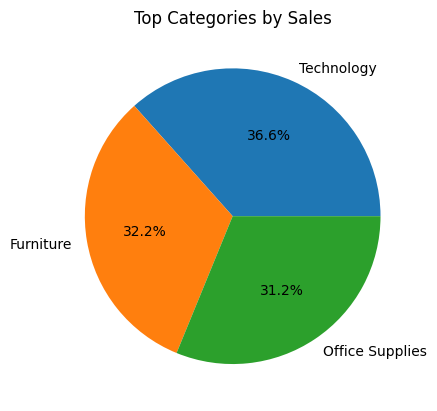

In [28]:
#plotting pie chart
plt.pie(top_categories_by_sales['Sales'], labels=top_categories_by_sales['Category'], autopct='%1.1f%%')
plt.title('Top Categories by Sales')
plt.show()

   Sub-Category        Sales
0        Phones  327782.4480
1        Chairs  322822.7310
2       Storage  219343.3920
3        Tables  202810.6280
4       Binders  200028.7850
5      Machines  189238.6310
6   Accessories  164186.7000
7       Copiers  146248.0940
8     Bookcases  113813.1987
9    Appliances  104618.4030
10  Furnishings   89212.0180
11        Paper   76828.3040
12     Supplies   46420.3080
13          Art   26705.4100
14    Envelopes   16128.0460
15       Labels   12347.7260
16    Fasteners    3001.9600


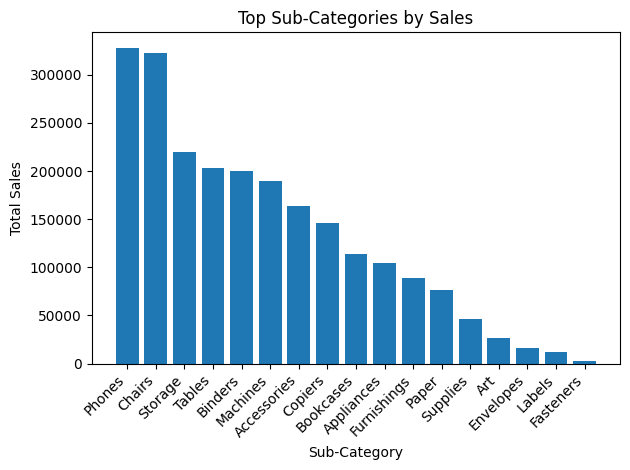

In [29]:
#top sub-categories by sales
top_categories_by_sales = subcategory_count_sales.groupby('Sub-Category')['Sales'].sum().reset_index()
top_categories_by_sales = top_categories_by_sales.sort_values(by='Sales', ascending=False)
print(top_categories_by_sales.reset_index(drop = True))

#adding barchart
plt.bar(top_categories_by_sales['Sub-Category'], top_categories_by_sales['Sales'])
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.title('Top Sub-Categories by Sales')
# Adjust x-axis labels to prevent overlap
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees and align to the right

plt.tight_layout()  # Improve overall plot layout (optional, but often helpful)

plt.show()


# **Product Analysis**

In [30]:
#convert the order date column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst= True)
print(df['Order Date'])

0      2017-11-08
1      2017-11-08
2      2017-06-12
3      2016-10-11
4      2016-10-11
          ...    
9795   2017-05-21
9796   2016-01-12
9797   2016-01-12
9798   2016-01-12
9799   2016-01-12
Name: Order Date, Length: 9800, dtype: datetime64[ns]


# **Yearly Sales Analysis**

In [31]:
#Group by year and calculate total sales
Annual_Sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum().reset_index()
Annual_Sales.columns = ['Year', 'Total Sales']
Annual_Sales['Year'] = Annual_Sales['Year'].astype(int)
print(Annual_Sales)

   Year  Total Sales
0  2015  479856.2081
1  2016  459436.0054
2  2017  600192.5500
3  2018  722052.0192


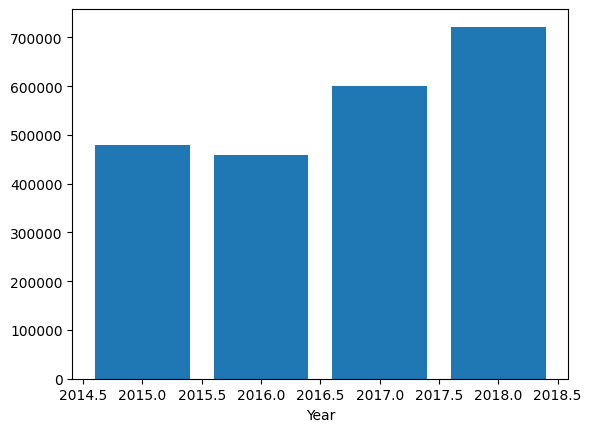

In [32]:
#Bar Graph
plt.bar(Annual_Sales['Year'].astype(int), Annual_Sales['Total Sales'])
plt.xlabel('Year')
plt.show ()

Text(0.5, 0, 'Year')

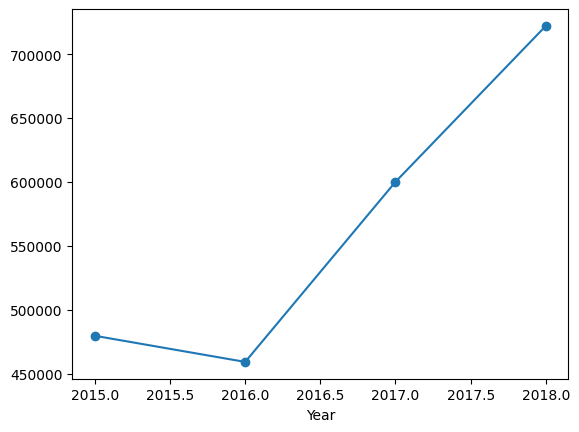

In [33]:
#line graph
plt.plot(Annual_Sales['Year'].astype(int), Annual_Sales['Total Sales'], marker = 'o', linestyle = '-')
plt.xlabel('Year')

# **Quarterly Sales Analysis**

In [34]:
#filter data for 2018
df_2018 = df[df['Order Date'].dt.year == 2018]
#Quarterly sales for 2018
Quarterly_Sales = df_2018.groupby(df_2018['Order Date'].dt.quarter)['Sales'].sum().reset_index()
Quarterly_Sales.columns = ['Quarter', 'Total Sales']
print(Quarterly_Sales)


   Quarter  Total Sales
0        1  122260.8842
1        2  127558.6200
2        3  193815.8400
3        4  278416.6750


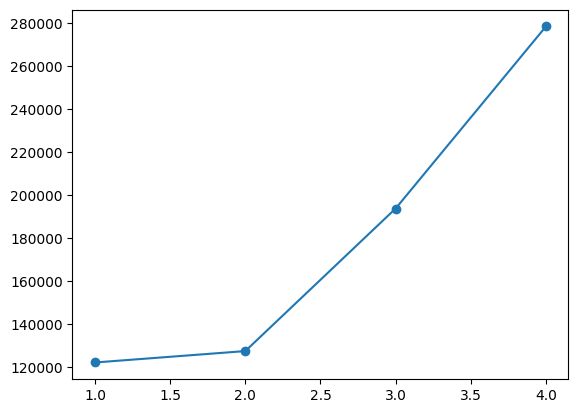

In [35]:
#line graph
plt.plot(Quarterly_Sales['Quarter'], Quarterly_Sales['Total Sales'], marker = 'o', linestyle = '-')

# **Monthly Sales 2018**

In [36]:
from ast import Mod
#monthly sales for 2018
Monthly_Sales = df_2018.groupby(df_2018['Order Date'].dt.month)['Sales'].sum().reset_index()
Monthly_Sales.columns = ['Month', 'Total Sales']
Monthly_Sales_sorted = Monthly_Sales.sort_values(by='Total Sales', ascending=True)
print(Monthly_Sales_sorted)



    Month  Total Sales
1       2   19920.9974
3       4   35541.9101
0       1   43476.4740
4       5   43825.9822
6       7   44825.1040
5       6   48190.7277
2       3   58863.4128
7       8   62837.8480
9      10   77448.1312
11     12   83030.3888
8       9   86152.8880
10     11  117938.1550


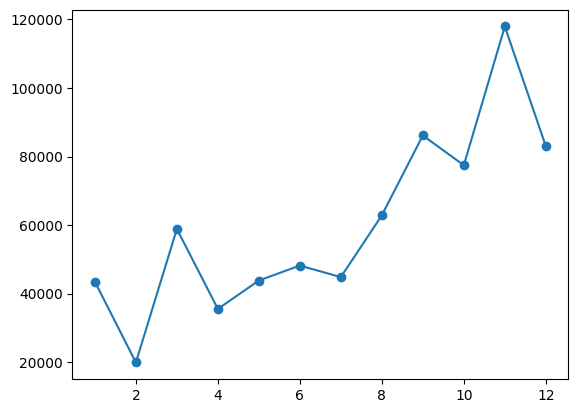

In [37]:
#line graph
plt.plot(Monthly_Sales['Month'], Monthly_Sales['Total Sales'], marker = 'o', linestyle = '-')


# **Sales Trends**

In [38]:
# Group by months and calculate total sales
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()

# Rename columns for clarity
monthly_sales.columns = ['Month', 'Total Sales']

print(monthly_sales)

Order Date
2015-01     14205.7070
2015-02      4519.8920
2015-03     55205.7970
2015-04     27906.8550
2015-05     23644.3030
2015-06     34322.9356
2015-07     33781.5430
2015-08     27117.5365
2015-09     81623.5268
2015-10     31453.3930
2015-11     77907.6607
2015-12     68167.0585
2016-01     18066.9576
2016-02     11951.4110
2016-03     32339.3184
2016-04     34154.4685
2016-05     29959.5305
2016-06     23599.3740
2016-07     28608.2590
2016-08     36818.3422
2016-09     63133.6060
2016-10     31011.7375
2016-11     75249.3995
2016-12     74543.6012
2017-01     18542.4910
2017-02     22978.8150
2017-03     51165.0590
2017-04     38679.7670
2017-05     56656.9080
2017-06     39724.4860
2017-07     38320.7830
2017-08     30542.2003
2017-09     69193.3909
2017-10     59583.0330
2017-11     79066.4958
2017-12     95739.1210
2018-01     43476.4740
2018-02     19920.9974
2018-03     58863.4128
2018-04     35541.9101
2018-05     43825.9822
2018-06     48190.7277
2018-07     44825.1040


<Axes: xlabel='Order Date'>

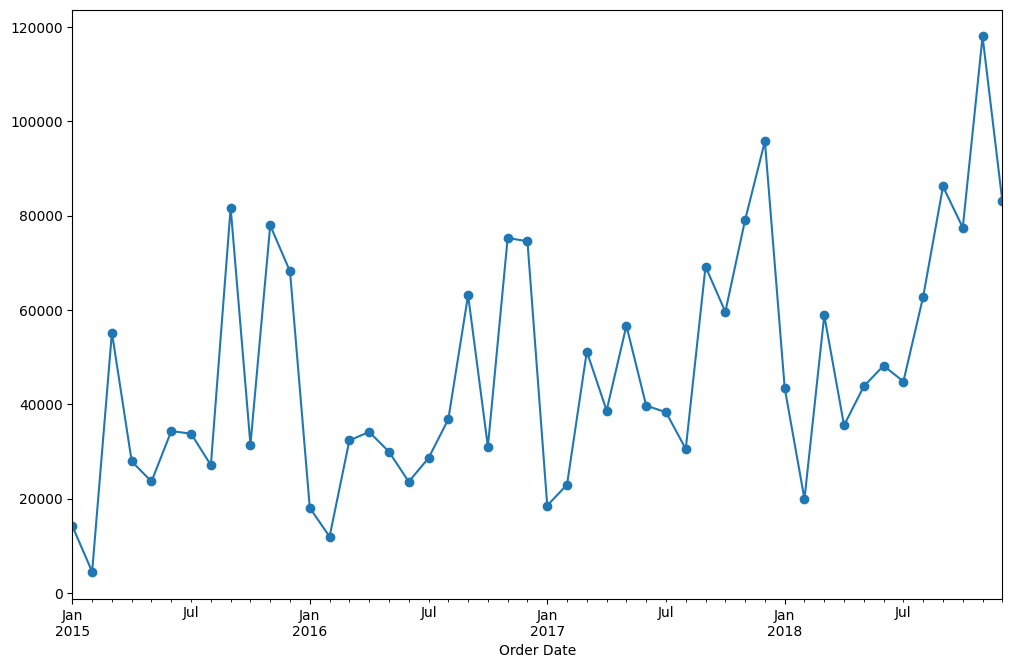

In [39]:


# Plot monthly sales trends
plt.figure(figsize=(12, 26))
plt.subplot(3, 1, 1)
monthly_sales.plot(kind='line', marker='o')
# ... (labels and plotting code)

<Axes: xlabel='Order Date'>

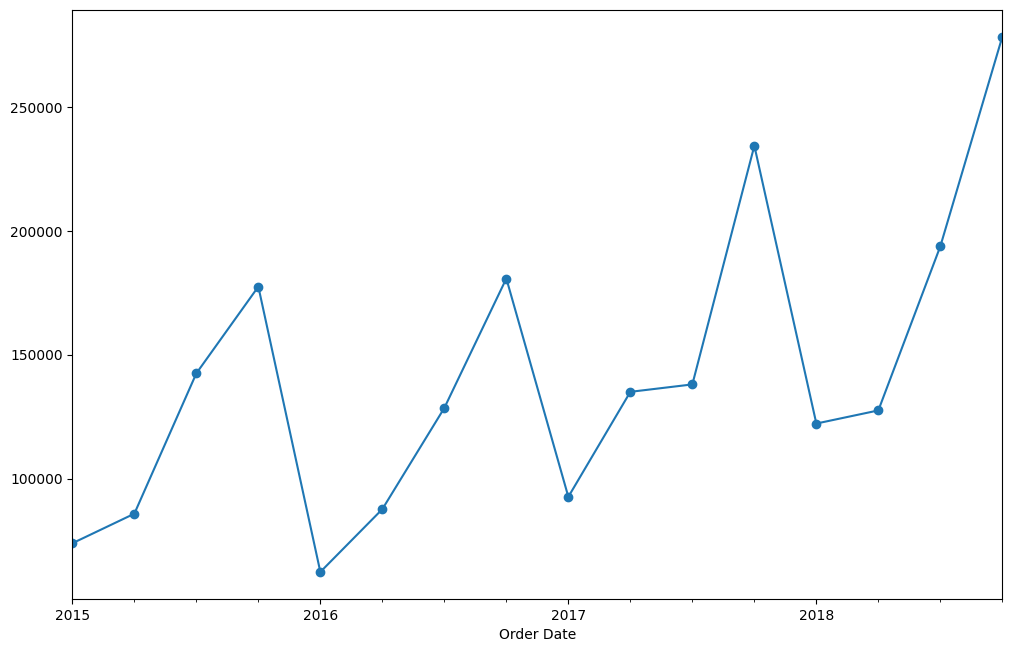

In [40]:
#Quarterly trends
quarterly_sales = df.groupby(df['Order Date'].dt.to_period('Q'))['Sales'].sum()

#plot line chart
plt.figure(figsize=(12, 26))
plt.subplot(3, 1, 1)
quarterly_sales.plot(kind = 'line', marker='o', linestyle='-')


Text(0.5, 1.0, 'Yearly Sales Over Time')

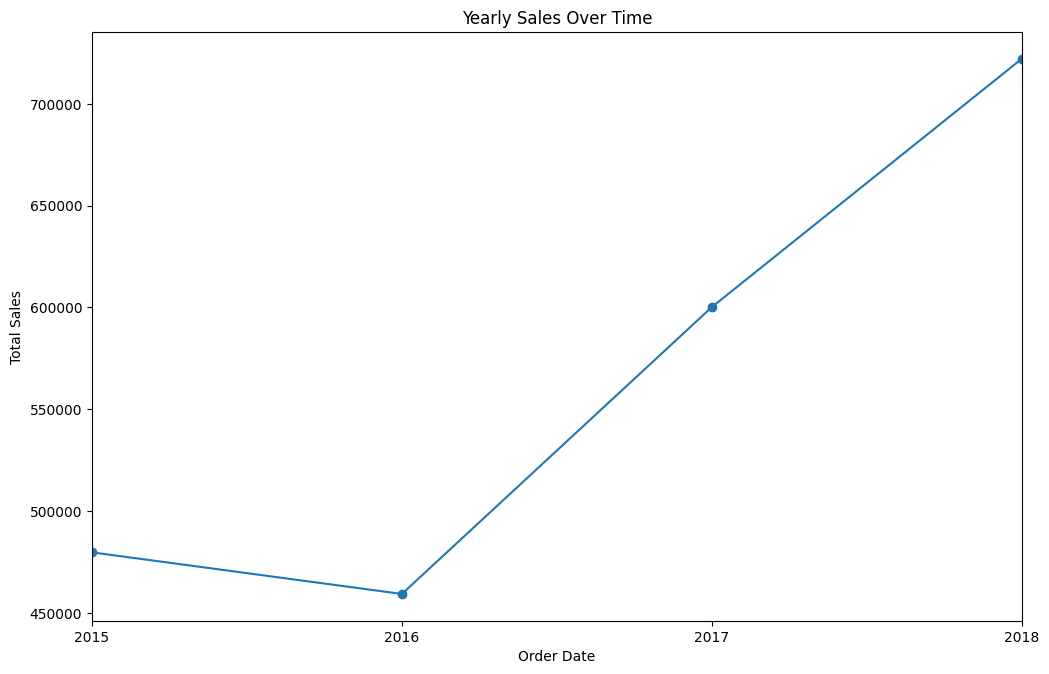

In [41]:
#yearly trends
yearly_sales = df.groupby(df['Order Date'].dt.to_period('Y'))['Sales'].sum()

#plot line chart
plt.figure(figsize=(12, 26))
plt.subplot(3, 1, 1)
yearly_sales.plot(kind = 'line', marker='o', linestyle='-')
# Set labels and title
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.title('Yearly Sales Over Time')


Text(0.5, 1.0, 'Daily Sales Over Time')

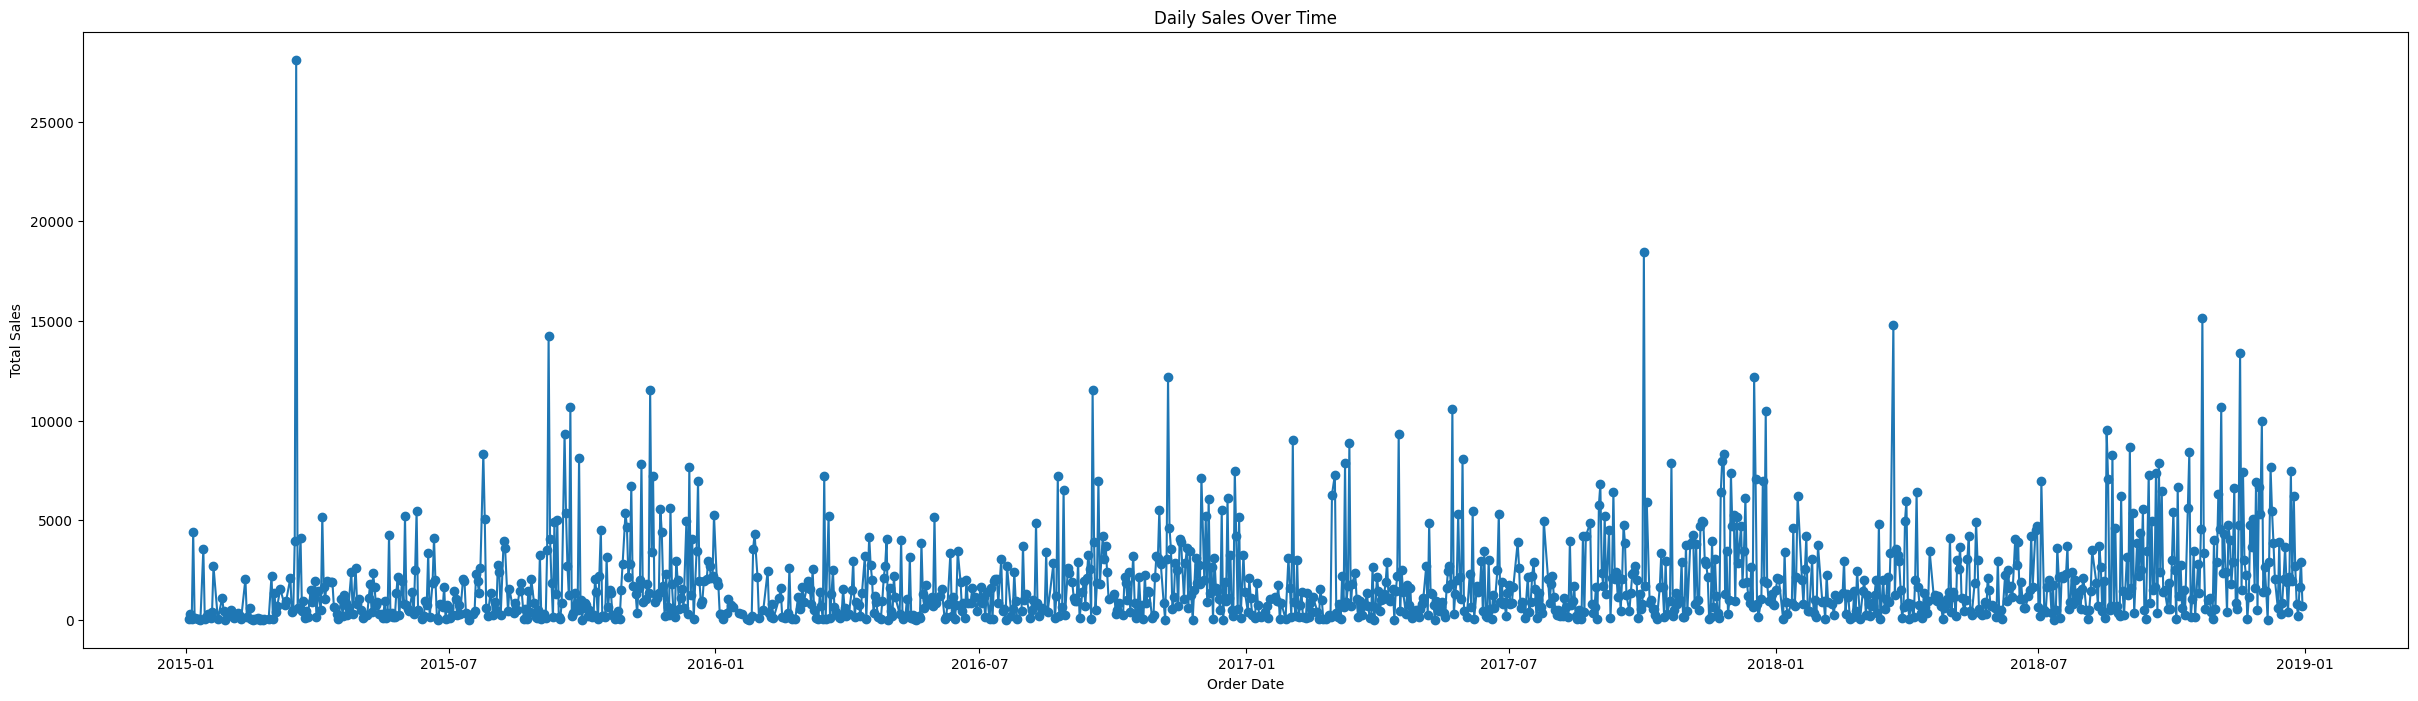

In [42]:
#Daily sales over time
df_summary = df.groupby('Order Date')['Sales'].sum().reset_index()

# Create a line plot
plt.figure(figsize=(30, 8))
plt.plot(df_summary['Order Date'], df_summary['Sales'], marker='o', linestyle='-')

# Set labels and title
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.title('Daily Sales Over Time')



# **Geographical Mapping Analysis**

In [43]:
#import Libraries
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = 'colab'

In [44]:
# Your dictionary mapping state names to abbreviations
all_state_mapping = {"Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR",
    "California": "CA", "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE",
    "Florida": "FL", "Georgia": "GA", "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL",
    "Indiana": "IN", "Iowa": "IA", "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA",
    "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN",
    "Mississippi": "MS", "Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV",
    "New Hampshire": "NH", "New Jersey": "NJ", "New Mexico": "NM", "New York": "NY",
    "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK",
    "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC",
    "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT",
    "Virginia": "VA", "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY"
}


In [45]:
# Add Abbreviation
df['Abbreviation'] = df['State'].map(all_state_mapping)

# Calculate Sales per State
sum_of_sales = df.groupby('State')['Sales'].sum().reset_index()

# Add Abbreviation to sum_of_sales (for joining later in Plotly)
sum_of_sales['Abbreviation'] = sum_of_sales['State'].map(all_state_mapping)

In [46]:
fig = go.Figure(data=go.Choropleth(
    locations=sum_of_sales['Abbreviation'], # State abbreviations
    locationmode='USA-states',
    z=sum_of_sales['Sales'], # Sales values determine color intensity
    hoverinfo='location+z', # Hover shows state + sales value
    showscale=True # Add a color scale for interpreting values visually
))

fig.update_geos(projection_type="albers usa")
fig.update_layout(
    geo_scope='usa',
    title='Total Sales by U.S. State'
)

fig.show()

# **Horizontal bar Graph (Seaborn)**

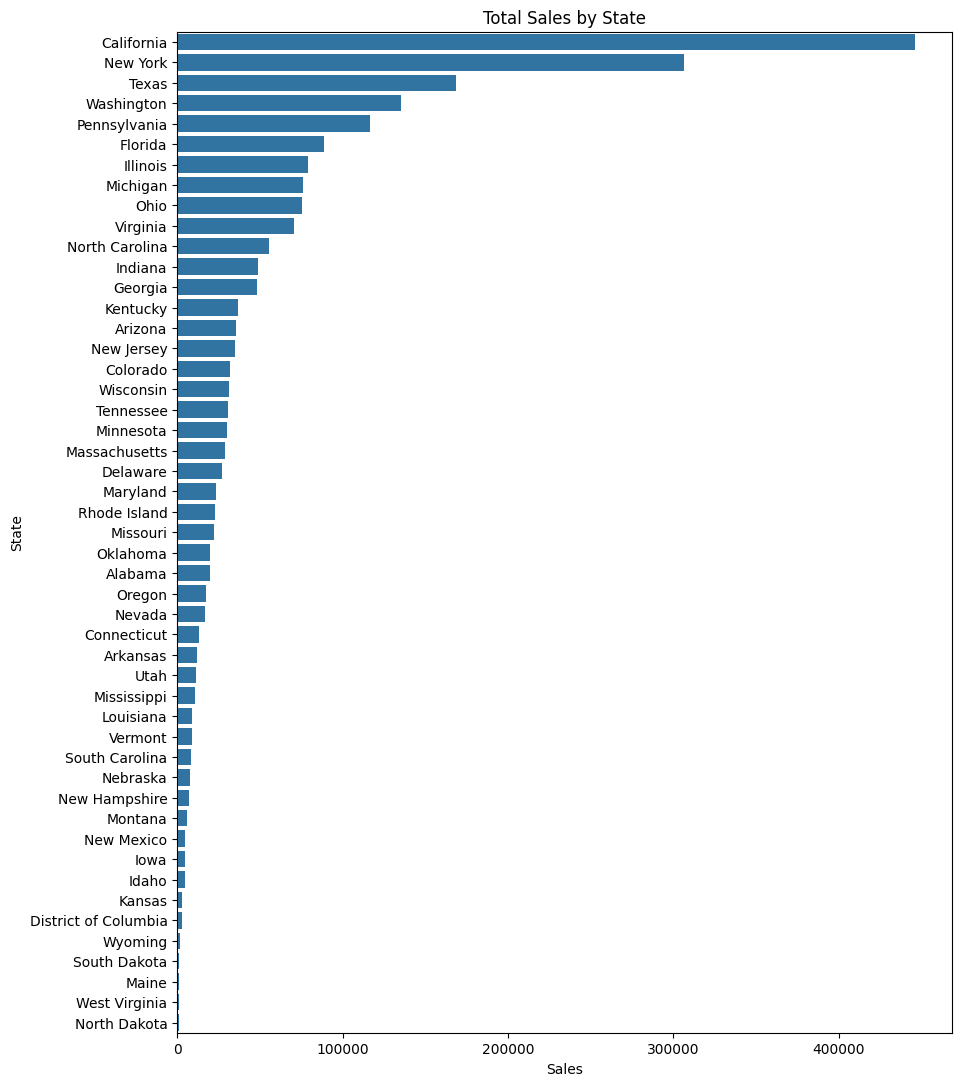

In [48]:
# Group by state and calculate the sum of sales
sum_of_sales = df.groupby('State')['Sales'].sum().reset_index()

# Sort the DataFrame by the 'Sales' column in descending order
sum_of_sales = sum_of_sales.sort_values(by='Sales', ascending=False)

# Create a horizontal bar graph
plt.figure(figsize=(10, 13))
ax = sns.barplot(x='Sales', y='State', data=sum_of_sales, errorbar=None)

plt.xlabel('Sales')
plt.ylabel('State')
plt.title('Total Sales by State')
plt.show()



# **Nested Piechart**

In [52]:
import plotly.express as px

# Summarize the Sales data by Category and Sub-Category
df_summary = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()

# Create a nested pie chart
fig = px.sunburst(
    df_summary, path=['Category', 'Sub-Category'], values='Sales')

fig.show()

In [50]:
# Summarize the Sales data by Category, Ship Mode and Sub-Category
df_summary = df.groupby(['Category', 'Ship Mode', 'Sub-Category'])['Sales'].sum().reset_index()

#Create a treemap
fig = px.treemap(df_summary, path=['Category', 'Ship Mode', 'Sub-Category'], values='Sales')

fig.show()